In [1]:
"""
TP 17/09/2023
Plot domain of the study Feb 08 - 11 am with GIGATL3 
Plot at the same date : vrt, strain and surface tracer concentration for RREX2008 simu
"""

import sys 
sys.path.append('/home2/datahome/tpicard/python/Python_Modules_RREX2008/')

######################
#import useful modules
######################

from Modules import *
from Modules_gula import *
from matplotlib.offsetbox import AnchoredText
import cartopy.crs as ccrs
import cartopy
from datetime import date, timedelta, datetime
import netCDF4
import scipy.stats as st
import matplotlib as mpl
import matplotlib.colors as colors
import netCDF4 as nc4

# SUBDOMAIN RREX2008
#simul_rrex = load(simul = 'rrex2008_feb [0,802,0,1002,[1,200,1]] ' + format(8), light=False, output=True)

dir_save = "/home2/datawork/tpicard/M2_intership/RREX2008_FT_3h/figures/"
dpi_nb = 50

tstep = 55
#step = 220 #last

simul_rrex = load(simul = 'rrex2008_avg_3h_feb [0,802,0,1002,[1,200,1]] ' + format(tstep), light=False, output=False)

depth = 0
#z_r,z_w = tools.get_depths(simul_rrex)
tpas = var('tpas01',simul_rrex,depths=[0]).data
#mld_d = var('hbls_rho',simul_rrex).data
u = var('u',simul_rrex,depths=[0]).data
v = var('v',simul_rrex,depths=[0]).data
w = var('w',simul_rrex,depths=[100]).data
strain_rrex =  tools.get_strain(u,v,simul_rrex.pm,simul_rrex.pn) / simul_rrex.f
vrt_rrex =  tools.psi2rho(tools.get_vrt(u,v,simul_rrex.pm,simul_rrex.pn) / tools.rho2psi(simul_rrex.f))

##############################################################
# Define horizontal coordinates (deg, km, or grid points)
########################################################

coord = 'deg'

lon_rrex = simul_rrex.x; lat_rrex = simul_rrex.y

[lon_km_rrex,lat_km_rrex] = np.meshgrid(np.arange(simul_rrex.x.shape[0])+simul_rrex.coord[2],np.arange(simul_rrex.x.shape[1])+simul_rrex.coord[0])
lon_km_rrex = (lon_km_rrex/np.mean(simul_rrex.pm)*1e-3).T
lat_km_rrex = (lat_km_rrex/np.mean(simul_rrex.pn)*1e-3).T


# GIGATL3

simul = load(simul = 'gigatl3_rrexnum',time = 0, light=False, output=False) #start 30/12/2007
temp = var('temp',simul).data
u = var('u',simul,depths=[0]).data
v = var('v',simul,depths=[0]).data
strain =  tools.get_strain(u,v,simul.pm,simul.pn) / simul.f
vrt =  tools.psi2rho(tools.get_vrt(u,v,simul.pm,simul.pn) / tools.rho2psi(simul.f))


##############################################################
# Define horizontal coordinates (deg, km, or grid points)
########################################################

coord = 'deg'

if coord=='deg':
    #using lon,lat
    lon = simul.x; lat = simul.y
    xlabel = 'lon'; ylabel = 'lat'
elif coord=='km':
    # using km
    [lon,lat] = np.meshgrid(np.arange(simul.x.shape[0])+simul.coord[2],np.arange(simul.x.shape[1])+simul.coord[0])
    lon = (lon/np.mean(simul.pm)*1e-3).T
    lat = (lat/np.mean(simul.pn)*1e-3).T
    xlabel = 'km'; ylabel = 'km'
elif coord=='points':
    # using grid points
    [lon,lat] = np.meshgrid(np.arange(simul.x.shape[0])+simul.coord[2],np.arange(simul.x.shape[1])+simul.coord[0])
    lon,lat = lon.T,lat.T
    xlabel = 'grid pts'; ylabel = 'grid pts'

print('----- DONE ----- ')



/home/datawork-lops-rrex/tpicard/OUTPUTS_RREX2008_Full_tracer
/home/datawork-lops-rrex/tpicard/OUTPUTS_RREX2008_Full_tracer
----- DONE ----- 


In [2]:
# Get the date for both simu, make sure it matches

simul_rrex = load(simul = 'rrex2008_avg_3h_feb [0,802,0,1002,[1,200,1]] ' + format(55), light=False, output=False)
print(simul_rrex.date)
print(simul_rrex.year)

simul = load(simul = 'gigatl3_rrexnum',time = 0, light=False, output=False) #start 30/12/20
print(simul.date)
print(simul.year)

/home/datawork-lops-rrex/tpicard/OUTPUTS_RREX2008_Full_tracer
/home/datawork-lops-rrex/tpicard/OUTPUTS_RREX2008_Full_tracer
Feb 08 - 10:28
2008
Feb 08 - 11:57
2008


<ipython-input-6-979f18af90ad>:24: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  m = Basemap(width=10000000/4,height=8000000/4.0,
<ipython-input-6-979f18af90ad>:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mpos = m.pcolormesh(xx,yy,vrt,cmap = plt.cm.RdBu_r,vmin=-0.5,vmax=0.5)
<ipython-input-6-979f18af90ad>:66: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  p

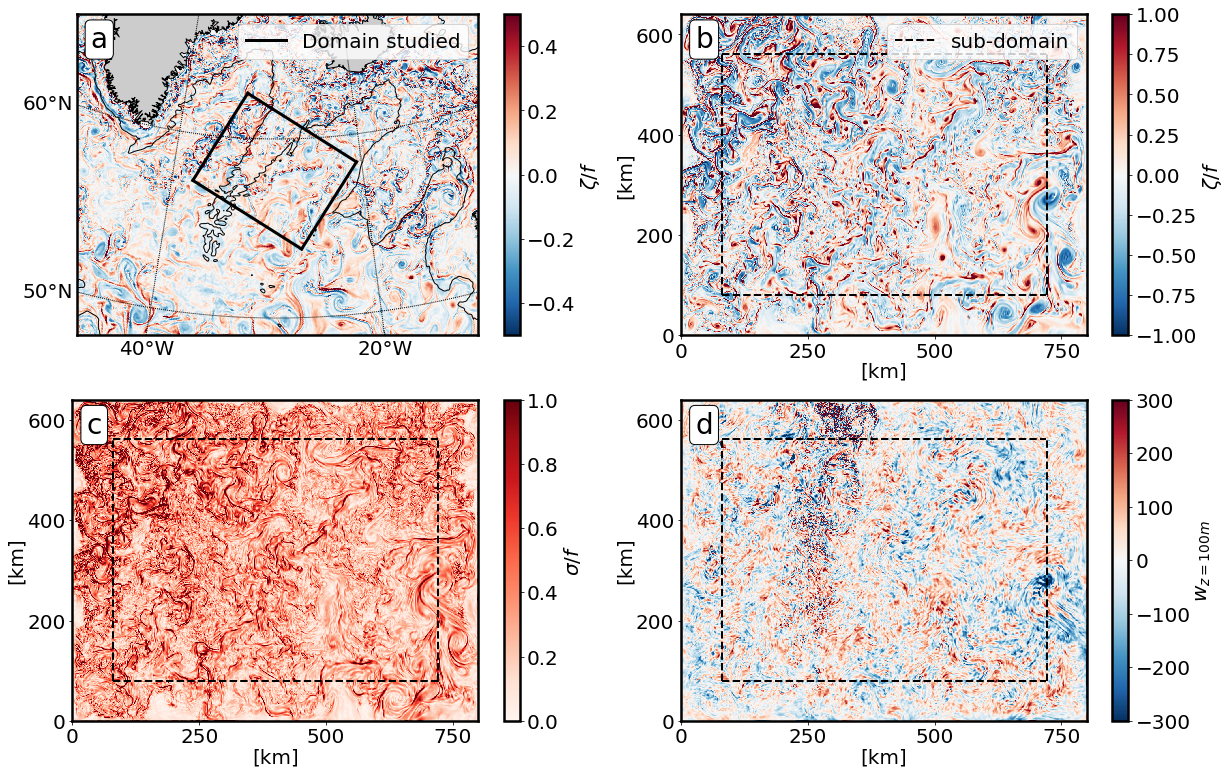

In [6]:
# Create and save the plots 

%matplotlib inline
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.gridspec as gridspec
import matplotlib.transforms as mtransforms

fig = plt.figure(figsize=(20,13))
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2.50
props = dict(boxstyle='round', facecolor='white', alpha=1)


ax = fig.add_subplot(2,2,1)

label = 'a'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax.text(0.01, 0.98, label, transform=ax.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

m = Basemap(width=10000000/4,height=8000000/4.0,
            resolution='l',projection='lcc',\
            lat_ts=65,lat_0=58,lon_0=-29)

m.drawcoastlines()

# draw parallels and meridians.
m.fillcontinents()

m.drawparallels(np.arange(-80.,81.,10.),labels=[True,False,False,False], fontsize = 20)
m.drawmeridians(np.arange(-180.,181.,20.),labels=[False,False,False,True], fontsize =20)
xx, yy = m(lon, lat)
xx_rrex, yy_rrex = m(lon_rrex, lat_rrex)
mpos = m.plot(xx_rrex[:,0], yy_rrex[:,0],color='k',alpha=1,linestyle='-',linewidth=3)
mpos = m.plot(xx_rrex[:,-1], yy_rrex[:,-1],color='k',alpha=1,linestyle='-',linewidth=3)
mpos = m.plot(xx_rrex[0,:], yy_rrex[0,:],color='k',alpha=1,linestyle='-',linewidth=3)
mpos = m.plot(xx_rrex[-1,:], yy_rrex[-1,:],color='k',alpha=1,linestyle='-',linewidth=3,label='Domain studied')
plt.legend(prop={'size': 20}, frameon=True,loc=1)
mpos = m.pcolormesh(xx,yy,vrt,cmap = plt.cm.RdBu_r,vmin=-0.5,vmax=0.5)
CS1 = m.contour(xx,yy,simul.topo,[2000],colors = ('k',), linewidths = (1,))

cb = plt.colorbar(mpos,ax = ax)  
cb.set_label(r'$\zeta/f$',fontsize=20)
cb.ax.tick_params(labelsize=20)


x, y = m(-29, 54)
x2, y2 = m(-40, 40)

ax = fig.add_subplot(2,2,2)

label = 'b'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax.text(0.01, 0.98, label, transform=ax.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

plt.xticks([0,250,500,750], [0,250,500,750],size=20)
plt.xlabel('[km]',size=20,labelpad=1)
plt.yticks([0,200,400,600], [0,200,400,600],size=20)
plt.ylabel('[km]',size=20,labelpad=1)

pc = ax.pcolormesh(lon_km_rrex,lat_km_rrex,vrt_rrex,cmap = plt.cm.RdBu_r,vmin=-1,vmax=1)
cb2 = plt.colorbar(pc,ax = ax)  
cb2.set_label(r'$\zeta/f$',fontsize=20)
cb2.ax.tick_params(labelsize=20)

plt.plot(lon_km_rrex[100,100:-100],lat_km_rrex[100,100:-100],c='k',linestyle="--",linewidth=2)
plt.plot(lon_km_rrex[-100,100:-100],lat_km_rrex[-100,100:-100],c='k',linestyle="--",linewidth=2)
plt.plot(lon_km_rrex[100:-100,100],lat_km_rrex[100:-100,100],c='k',linestyle="--",linewidth=2)
plt.plot(lon_km_rrex[100:-100,-100],lat_km_rrex[100:-100,-100],c='k',linestyle="--",linewidth=2,label='sub-domain')
plt.legend(prop={'size': 20}, frameon=True,loc=1)

ax3 = fig.add_subplot(2,2,3)

label = 'c'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax3.text(0.01, 0.98, label, transform=ax3.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

plt.xticks([0,250,500,750], [0,250,500,750],size=20)
plt.xlabel('[km]',size=20,labelpad=1)
plt.yticks([0,200,400,600], [0,200,400,600],size=20)
plt.ylabel('[km]',size=20,labelpad=1)
st = ax3.pcolormesh(lon_km_rrex,lat_km_rrex,strain_rrex,cmap = plt.cm.Reds,vmin=0,vmax=1)

cb2 = plt.colorbar(st,ax = ax3) 
cb2.set_label(r'$\sigma/f$',fontsize=20)
cb2.ax.tick_params(labelsize=20)

plt.plot(lon_km_rrex[100,100:-100],lat_km_rrex[100,100:-100],c='k',linestyle="--",linewidth=2)
plt.plot(lon_km_rrex[-100,100:-100],lat_km_rrex[-100,100:-100],c='k',linestyle="--",linewidth=2)
plt.plot(lon_km_rrex[100:-100,100],lat_km_rrex[100:-100,100],c='k',linestyle="--",linewidth=2)
plt.plot(lon_km_rrex[100:-100,-100],lat_km_rrex[100:-100,-100],c='k',linestyle="--",linewidth=2,label='sub-domain')

ax3 = fig.add_subplot(2,2,4)

label = 'd'
trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
ax3.text(0.01, 0.98, label, transform=ax3.transAxes + trans,
        fontsize=28, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=1, pad=0.2))

plt.xticks([0,250,500,750], [0,250,500,750],size=20)
plt.xlabel('[km]',size=20,labelpad=1)
plt.yticks([0,200,400,600], [0,200,400,600],size=20)
plt.ylabel('[km]',size=20,labelpad=1)
st = ax3.pcolormesh(lon_km_rrex,lat_km_rrex,w*3600*24,cmap = plt.cm.RdBu_r,vmin=-300,vmax=300)

plt.plot(lon_km_rrex[100,100:-100],lat_km_rrex[100,100:-100],c='k',linestyle="--",linewidth=2)
plt.plot(lon_km_rrex[-100,100:-100],lat_km_rrex[-100,100:-100],c='k',linestyle="--",linewidth=2)
plt.plot(lon_km_rrex[100:-100,100],lat_km_rrex[100:-100,100],c='k',linestyle="--",linewidth=2)
plt.plot(lon_km_rrex[100:-100,-100],lat_km_rrex[100:-100,-100],c='k',linestyle="--",linewidth=2,label='sub-domain')


cb2 = plt.colorbar(st,ax = ax3)  
cb2.set_label(r'$w_{z=100m}$',fontsize=20)
cb2.ax.tick_params(labelsize=20)

dpi_nb = 400
plt.savefig(dir_save+'map_atlantic_domain_tstep=55.png',dpi=dpi_nb,bbox_inches='tight')

In [52]:
gap_list = np.arange(-1,1.1,0.1) 

In [53]:
gap_list

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00])